# 1. Business Understanding

# 2. Data Mining

In [400]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [579]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style = "white", palette = sns.color_palette("Set1"))

df = pd.read_csv("King_County_House_prices_dataset.csv")


In [580]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 3. Data Cleaning

In [581]:
df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

What to predict: 
* price

What to ignore:
* id, date,

What to maybe ignore:
* lat,long, zip code
* view(has been viewed?)
* year renovated (many missing)

In [582]:
df_clean = df.drop(["id","zipcode","view"], axis = 1)


In [583]:
df_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


In [584]:
df_clean.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
sqft_lot15          0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
lat                 0
long                0
date                0
dtype: int64

data categorical:
grade,condition,floors,watefront

sqft_basement (has to be repaired)

In [585]:
df_clean['sqft_basement'] = pd.to_numeric(df_clean['sqft_basement'],errors='coerce')
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 3.0+ MB


In [586]:
df_clean=df_clean.dropna()

# 4. Data Exploration

(0, 15)

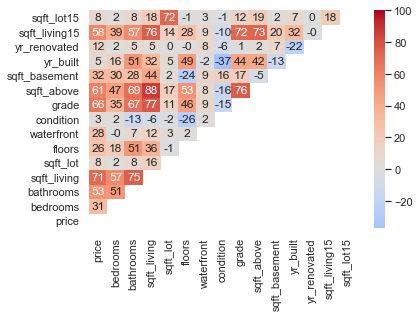

In [438]:
mask = np.triu(df_clean.corr())
ax = sns.heatmap(round(df_clean.corr()*100)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,center=0)
ax.set_ylim((0,15))
ax.set_xlim((0,15))

correlated with price:
* sqft above
* sqft living 15
* sqft living
* bathrooms
* bedrooms

autocorrelated:
* sqft_lot 15 with sqft_lot
* sqft_living with sqft_above and sqft_living and sqft_living 15

=> sqft_living, bathrooms, maybe bedrooms

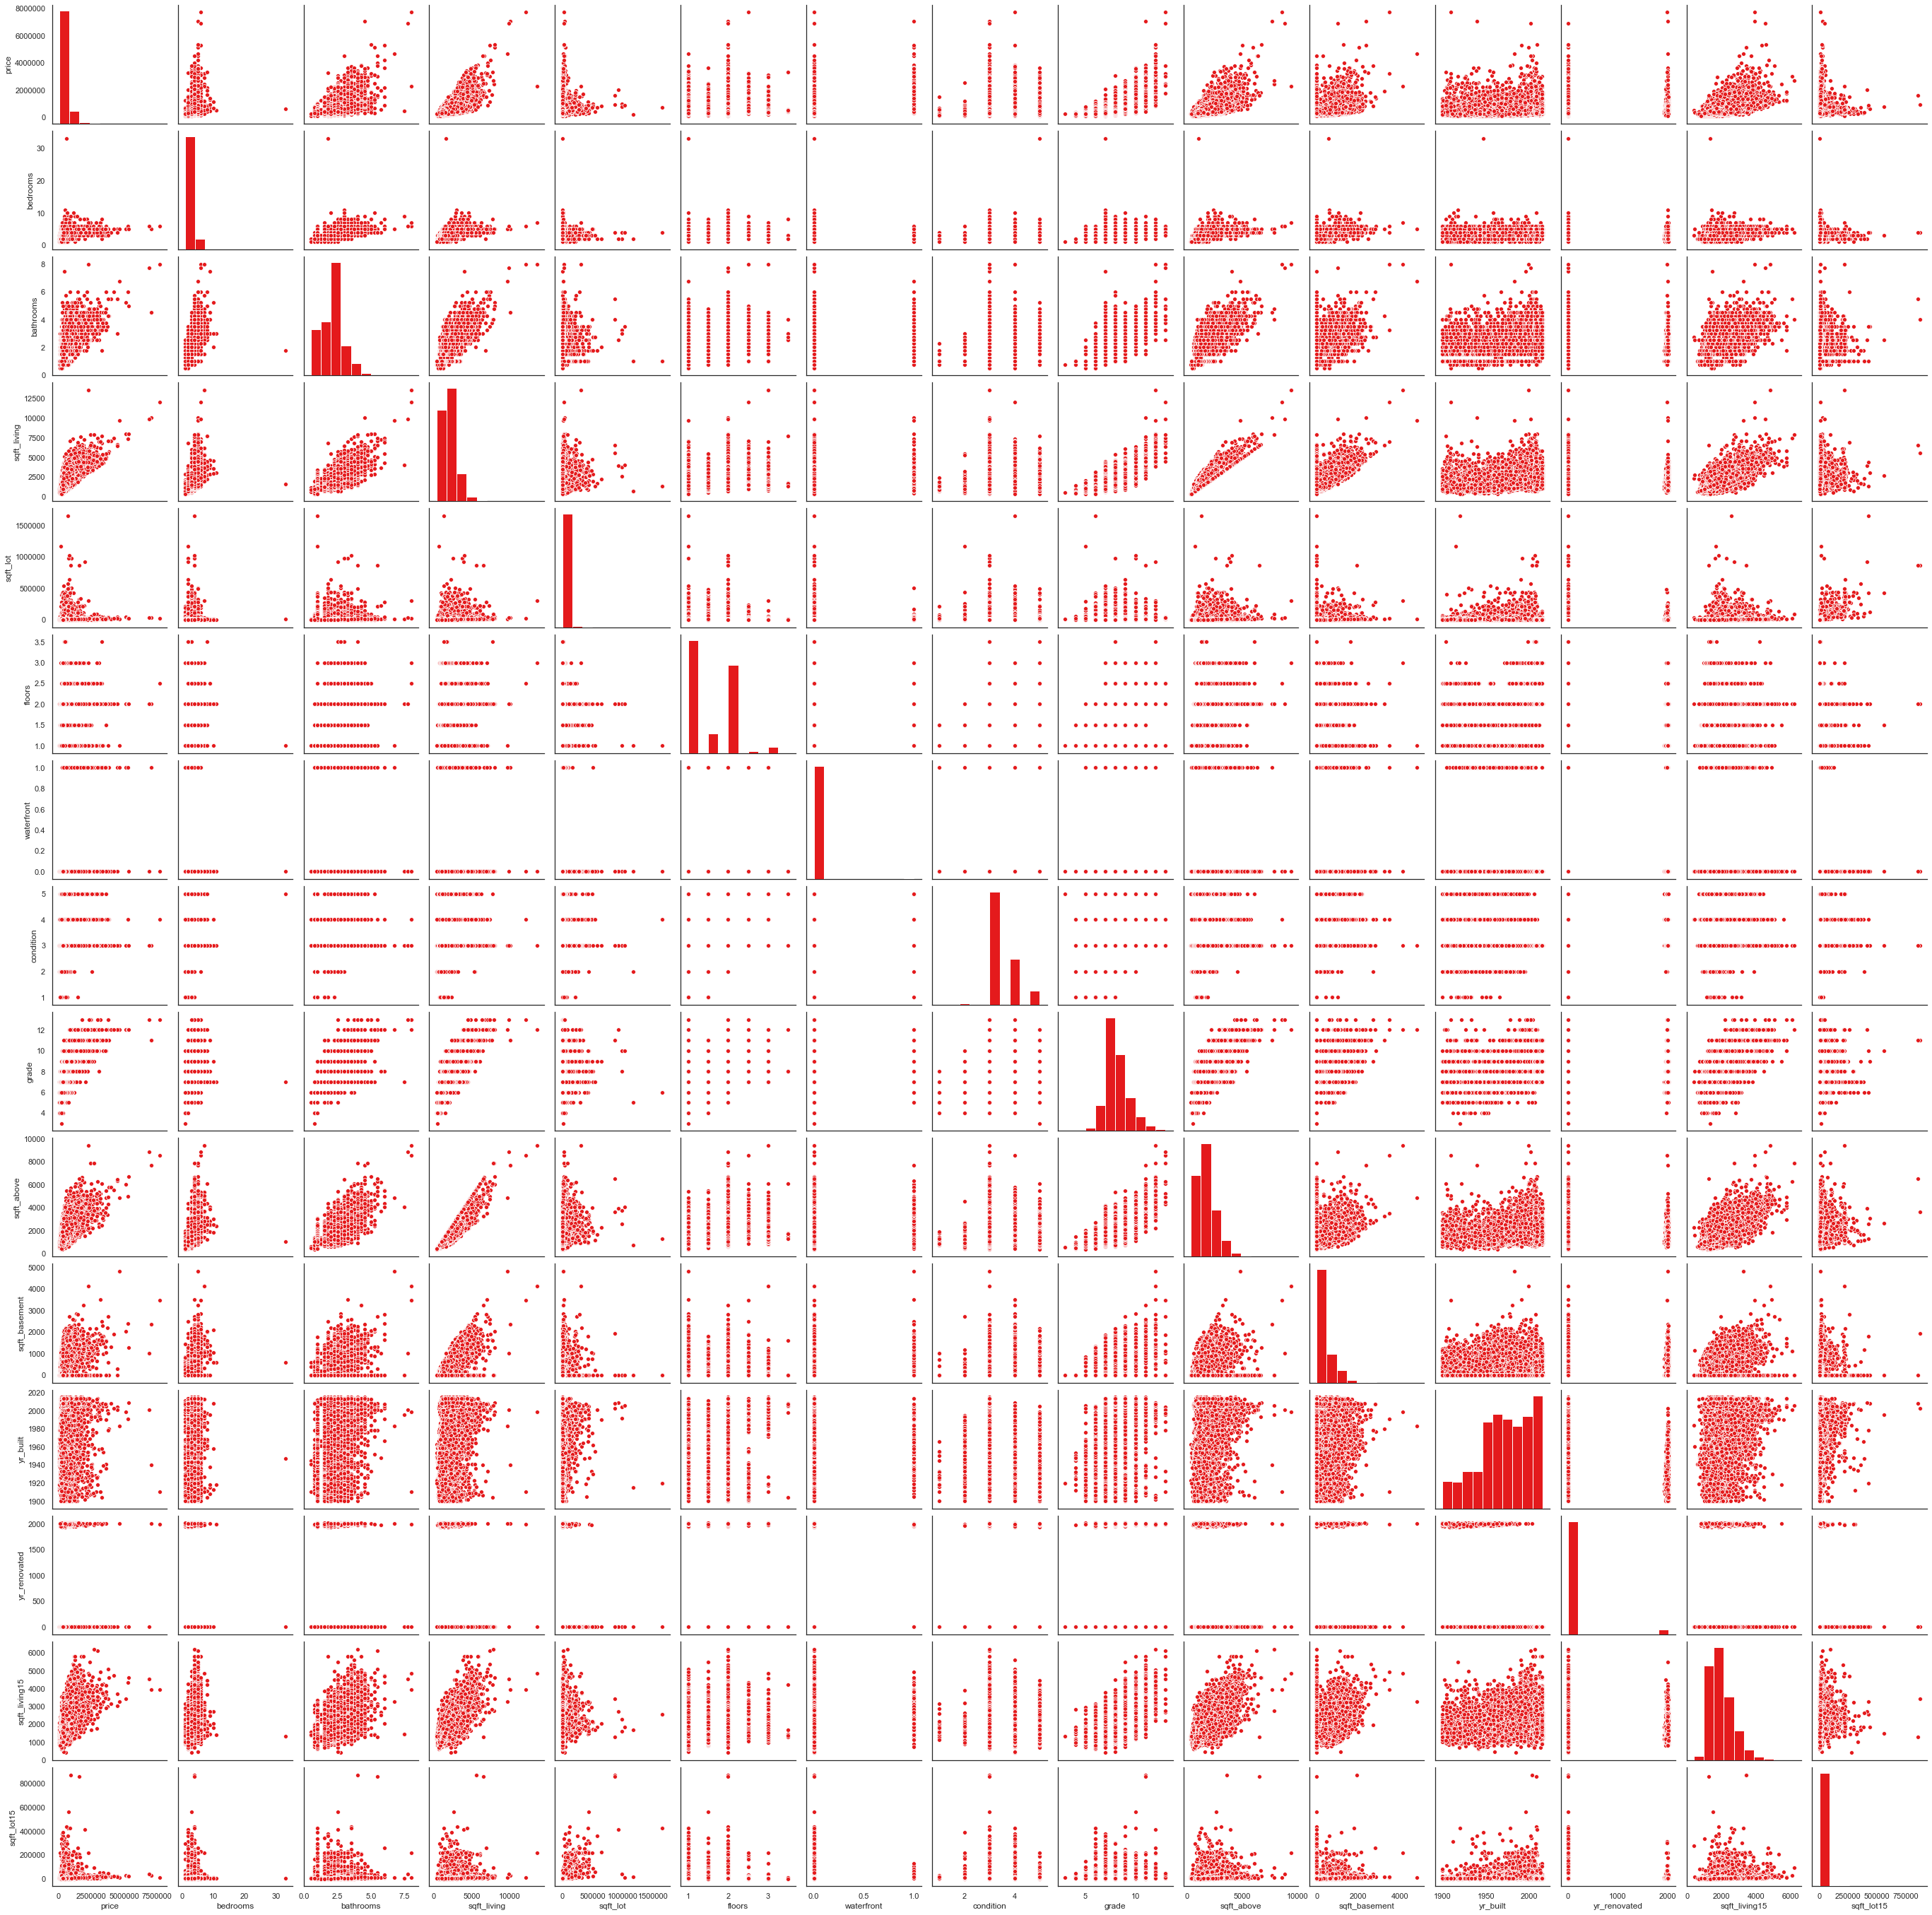

In [439]:
sns.pairplot(df_clean);

Interesting features:
* bathrooms
* sqft_living
* sqft_above

Maybe:
* sqft living 15

# 5. Feature Engineering

In [587]:
yr_sold=df_clean.date.str.extract("\/(.*)")[0].str.extract("\/(.*)")
yr_sold[0] = pd.to_numeric(yr_sold[0],errors='coerce')

In [588]:
# years since last renovation
series = df_clean.yr_renovated - df_clean.yr_built
series[series < 0] = 0
df_clean["yr_since_renov"] = yr_sold[0] - df_clean.yr_built - series
df_clean = df_clean.drop(["yr_renovated"], axis = 1)
df_clean.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_since_renov
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,23.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,49.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,28.0
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,47.6561,-122.005,4760,101930,13.0
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,47.4095,-122.315,1650,9711,52.0
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,47.5123,-122.337,1780,8113,55.0
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,47.3684,-122.031,2390,7570,12.0
11,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,4,7,860,300.0,1942,47.6900,-122.292,1330,6000,72.0
13,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,4,7,1370,0.0,1977,47.6127,-122.045,1370,10208,37.0
14,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,3,7,1810,0.0,1900,47.6700,-122.394,1360,4850,115.0


In [589]:
renov_bins = pd.cut(df_clean.yr_since_renov, 10)
renov_bins = renov_bins.rename("renov_bins")
df_clean = df_clean.join(renov_bins)

In [590]:
df_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_since_renov,renov_bins
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,23.0,"(22.2, 33.8]"
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,49.0,"(45.4, 57.0]"
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,28.0,"(22.2, 33.8]"
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,47.6561,-122.005,4760,101930,13.0,"(10.6, 22.2]"
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,47.4095,-122.315,1650,9711,52.0,"(45.4, 57.0]"


In [593]:
df_clean = df_clean.drop(["date"], axis = 1)

In [594]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_since_renov,renov_bins
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,23.0,"(22.2, 33.8]"
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,49.0,"(45.4, 57.0]"
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,28.0,"(22.2, 33.8]"
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,47.6561,-122.005,4760,101930,13.0,"(10.6, 22.2]"
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,47.4095,-122.315,1650,9711,52.0,"(45.4, 57.0]"


# 6. Predictive Modeling

In [595]:
y = df_clean.price
X_train, X_test, y_train, y_test = train_test_split(df_clean, y, test_size=0.2)

## 6.1. "Top Down" Methode

In [601]:
formula = "price ~ "
cols = list(X_train.columns)
cols.pop(cols.index("price"))
cols.pop(cols.index("renov_bins"))
for i in cols:
    formula += i + " " + "+" + " "


smf.ols(formula=formula.strip(" + "), data=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1924.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:49:17   Log-Likelihood:            -1.6863e+05
No. Observations:               12379   AIC:                         3.373e+05
Df Residuals:                   12363   BIC:                         3.374e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -3.64e+07   2.08e+06    -17.519      0.000   -4.05e+07   -3.23e+07
bedrooms        -3.38e+04   2424.885    -13.941      0.000   -3.86e+04   -2.91e+04
bathrooms       4.665e+04   4298.386     10.852      0.000    3.82e+04    5.51e+04
sqft_living      106.6657      2.968     35.939      0.000     100.848     112.483
sqft_lot           0.2076      0.061      3.389      0.001       0.088       0.328
floors          3594.7939   4717.973      0.762      0.446   -5653.168    1.28e+04
waterfront      7.823e+05   2.02e+04     38.781      0.000    7.43e+05    8.22e+05
condition       3.329e+04   3085.296     10.791      0.000    2.72e+04    3.93e+04
grade           1.029e+05   2845.543     36.162      0.000    9.73e+04    1.08e+05
sqft_above        60.0223      2.934     20.455      0.000      54.271      65.774
sqft_basement     46.6426      3.393     13.748      0.000      39.992      53.293
yr_built       -3122.6359    154.945    -20.153      0.000   -3426.352   -2818.920
lat             5.504e+05   1.36e+04     40.344      0.000    5.24e+05    5.77e+05
long           -1.278e+05   1.57e+04     -8.152      0.000   -1.58e+05    -9.7e+04
sqft_living15     41.8523      4.484      9.334      0.000      33.063      50.642
sqft_lot15        -0.3796      0.093     -4.102      0.000      -0.561      -0.198
yr_since_renov  -466.1493    160.724     -2.900      0.004    -781.193    -151.105
==============================================================================
Omnibus:                     7823.346   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225593.550
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      23.273   Cond. No.                     1.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [602]:
formula = "price ~ "
#cols = list(df_wo_cat.columns)
cols.pop(cols.index("sqft_lot"))
cols.pop(cols.index("floors"))
#cols.pop(cols.index("bedrooms"))
for i in cols:
    formula += i + " " + "+" + " "

# remove sqft_lot from formula, p >= 0.05
# remove sqft_above because of collinearity
# remove bedrooms cause coefficient < 0

smf.ols(formula=formula.strip(" + "), data=X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2218.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:49:18   Log-Likelihood:            -1.6863e+05
No. Observations:               12379   AIC:                         3.373e+05
Df Residuals:                   12365   BIC:                         3.374e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.595e+07   2.04e+06    -17.611      0.000      -4e+07    -3.2e+07
bedrooms       -3.407e+04   2424.216    -14.054      0.000   -3.88e+04   -2.93e+04
bathrooms       4.757e+04   4147.658     11.468      0.000    3.94e+04    5.57e+04
sqft_living      106.9298      2.950     36.243      0.000     101.147     112.713
waterfront      7.816e+05   2.02e+04     38.741      0.000    7.42e+05    8.21e+05
condition       3.276e+04   3077.729     10.645      0.000    2.67e+04    3.88e+04
grade           1.033e+05   2836.715     36.402      0.000    9.77e+04    1.09e+05
sqft_above        61.1545      2.718     22.497      0.000      55.826      66.483
sqft_basement     45.7736      3.089     14.817      0.000      39.718      51.829
yr_built       -3122.7366    154.736    -20.181      0.000   -3426.043   -2819.431
lat             5.495e+05   1.36e+04     40.536      0.000    5.23e+05    5.76e+05
long           -1.245e+05   1.55e+04     -8.042      0.000   -1.55e+05   -9.42e+04
sqft_living15     40.6682      4.448      9.143      0.000      31.949      49.387
sqft_lot15        -0.1621      0.066     -2.469      0.014      -0.291      -0.033
yr_since_renov  -460.4898    160.421     -2.871      0.004    -774.939    -146.040
==============================================================================
Omnibus:                     7800.513   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222665.858
Skew:                           2.561   Prob(JB):                         0.00
Kurtosis:                      23.136   Cond. No.                     1.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

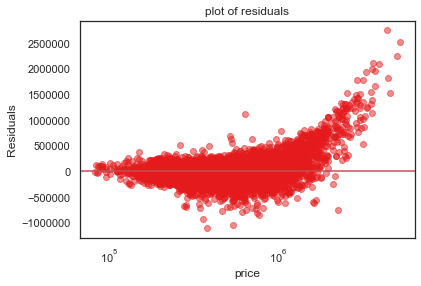

In [603]:
plt.scatter(x=X_train.price, y=smf.ols(formula=formula.strip(" + "), data=X_train).fit().resid, alpha = 0.5)
plt.title("plot of residuals")
plt.axhline(color='r')
plt.ylabel("Residuals")
plt.xlabel("price")
plt.xscale("log");

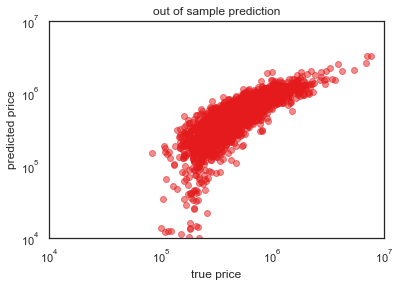

In [604]:

y_pred = smf.ols(formula=formula.strip(" + "), data=X_train).fit().predict(X_test)
plt.scatter(x=y_test, y=y_pred, alpha = 0.5)
plt.ylabel("predicted price")
plt.xlabel("true price")
plt.title("out of sample prediction")
plt.xscale("log")
plt.yscale("log")
plt.ylim(10000,10000000)
plt.xlim(10000,10000000);


In [606]:
print("Mean Squared Error (less is better):" + str(mean_squared_error(y_test, y_pred)))
print("R2 score (closer to 1 is better):" + str(r2_score(y_test, y_pred)))

Mean Squared Error (less is better):59032797604.57322
R2 score (closer to 1 is better):0.6566106843486927


## 6.2. Ausgewählte Variablen

In [525]:
# Aus correlation matrix und pairplots: bathrooms und sqft_living
smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train_wo_cat).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     5541.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:34:13   Log-Likelihood:            -2.2482e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16193   BIC:                         4.497e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.017e+05   6198.814    -16.402      0.000   -1.14e+05   -8.95e+04
sqft_living     269.4958      4.889     55.127      0.000     259.914     279.078
sqft_above      -40.3803      5.215     -7.743      0.000     -50.603     -30.158
sqft_living15    76.9541      4.668     16.487      0.000      67.805      86.103
==============================================================================
Omnibus:                    12068.081   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           627234.615
Skew:                           3.077   Prob(JB):                         0.00
Kurtosis:                      32.859   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

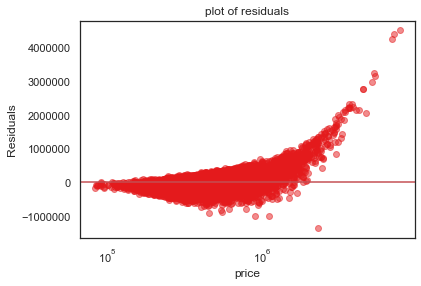

In [526]:
plt.scatter(x=X_train.price, y=smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train).fit().resid, alpha = 0.5)
plt.title("plot of residuals")
plt.axhline(color='r')
plt.ylabel("Residuals")
plt.xlabel("price")
plt.xscale("log");

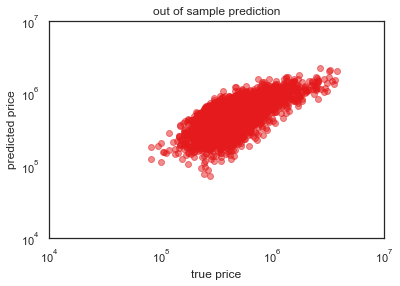

In [527]:
y_pred = smf.ols(formula="price ~ sqft_living + sqft_above + sqft_living15", data=X_train).fit().predict(X_test)

plt.scatter(x=y_test, y=y_pred, alpha = 0.5)
plt.ylabel("predicted price")
plt.xlabel("true price")
plt.title("out of sample prediction")
plt.ylim(10000,10000000)
plt.xlim(10000,10000000)
plt.xscale("log")
plt.yscale("log");

In [520]:
print("Mean Squared Error (less is better):" + str(mean_squared_error(y_test, y_pred)))
print("R2 score (closer to 1 is better):" + str(r2_score(y_test, y_pred)))

Mean Squared Error (less is better):68697011743.94681
R2 score (closer to 1 is better):0.5284914222823012


# 7. Visualization

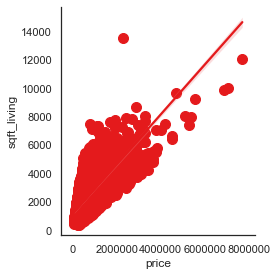

In [521]:
sns.lmplot(x="price", y="sqft_living", data=df_wo_cat, palette="muted", height=4, scatter_kws={"s": 100, "alpha": 1});

In [623]:
df_clean[df_clean.renov_bins == df_clean.renov_bins.unique()[0]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,yr_since_renov,renov_bins
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,23.0,"(22.2, 33.8]"
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,28.0,"(22.2, 33.8]"
24,329000.0,3,2.25,2450,6500,2.0,0.0,4,8,2450,0.0,1985,47.3739,-122.172,2200,6865,29.0,"(22.2, 33.8]"
34,322500.0,4,2.75,2060,6659,1.0,0.0,3,7,1280,780.0,1981,47.4276,-122.157,2020,8720,33.0,"(22.2, 33.8]"
41,775000.0,4,2.25,4220,24186,1.0,0.0,3,8,2600,1620.0,1984,47.4450,-122.347,2410,30617,30.0,"(22.2, 33.8]"
47,785000.0,4,2.50,2290,13416,2.0,0.0,4,9,2290,0.0,1981,47.6194,-122.151,2680,13685,33.0,"(22.2, 33.8]"
59,430000.0,4,3.00,1850,9976,2.0,0.0,3,8,1850,0.0,1991,47.5059,-122.149,2270,8542,24.0,"(22.2, 33.8]"
75,832500.0,4,4.00,3430,35102,2.0,0.0,4,10,2390,1040.0,1986,47.5822,-121.987,3240,35020,28.0,"(22.2, 33.8]"
90,243500.0,4,2.50,1980,7403,2.0,0.0,3,7,1980,0.0,1988,47.2897,-122.372,1980,7510,26.0,"(22.2, 33.8]"
95,905000.0,4,2.50,3300,10250,1.0,0.0,3,7,2390,910.0,1946,47.5873,-122.249,1950,6045,23.0,"(22.2, 33.8]"


In [640]:
sorted(df_clean.renov_bins.unique())[1]

Interval(10.6, 22.2, closed='right')

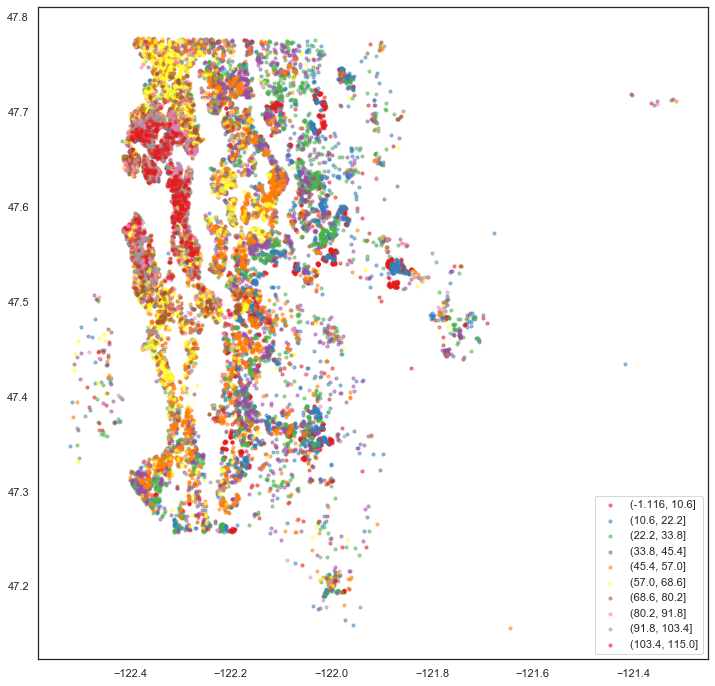

In [641]:
plt.figure (figsize=(12,12))
for i in range(10):
    plt.scatter(y=df_clean[df_clean.renov_bins == sorted(df_clean.renov_bins.unique())[i]].lat,
                x=df_clean[df_clean.renov_bins == sorted(df_clean.renov_bins.unique())[i]].long, 
                label= sorted(df_clean.renov_bins.unique())[i],
                s=10, alpha=0.5)
plt.legend();

# A. Summary

# B. Future Work

In [ ]:
# wieviel weichen unsere prognosen prozentual von den jeweiligen tatsächlichen preisen ab?